In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("dataset_train.csv")
# print(df.describe()['mean'])
# print(df.dtypes)
# Which Hogwarts class has an homogenous grade repartition between the four houses?
df.describe()

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


                           coures           Std
0                           Index    462.024530
1                      Arithmancy  16679.806036
2                       Astronomy    520.298268
3                       Herbology      5.219682
4   Defense Against the Dark Arts      5.212794
5                      Divination      4.155301
6                  Muggle Studies    486.344840
7                   Ancient Runes    106.285165
8                History of Magic      4.425775
9                 Transfiguration     44.125116
10                        Potions      3.147854
11      Care of Magical Creatures      0.971457
12                         Charms      8.783640
13                         Flying     97.631602


<Axes: >

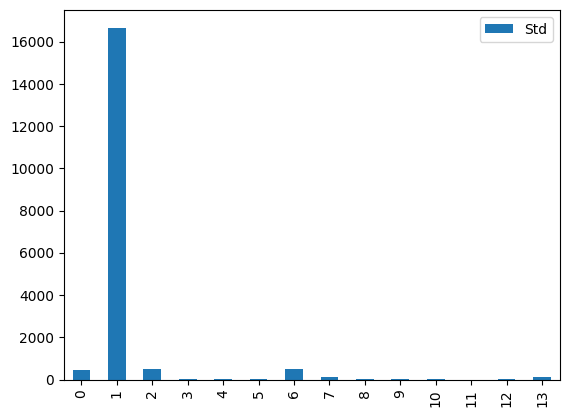

In [ ]:
# print(df.describe())
# print(df.std().values)
# df = df.drop('index', axis=1)
std_values = df.select_dtypes(include='number').std()
std_name = df.select_dtypes(include='number').std()
std_df = std_df = pd.DataFrame(std_values).reset_index()
std_df.columns = ['coures', 'Std']
print(std_df)

# print()
# sns.lmplot(x='coures', y="Std", data=std_df)
std_df.plot(kind='bar')
# sns.histplot(data=std_df)
# sns.histplot(data=std_df, x=df.std(), hue='CHAS')

In [166]:
df.head()
# std_df.plot.scatter(x='coures' ,y='Std')

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
